explained variance ratio (first two components): [0.92461621 0.05301557]


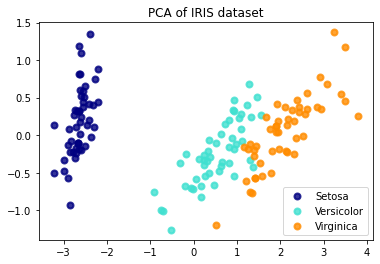

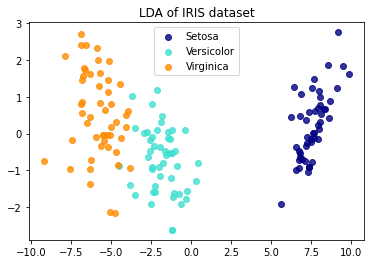

In [27]:
# LDA IN IRIS PYTHON

import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris_df = pd.read_csv('iris_dataset.csv')
target_names=["Setosa","Versicolor","Virginica"]
X = iris_df.drop(columns=['Id','Species'],axis=1)
iris_df['Species'] = iris_df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y = iris_df['Species']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

Accuracy: 0.9733333333333334


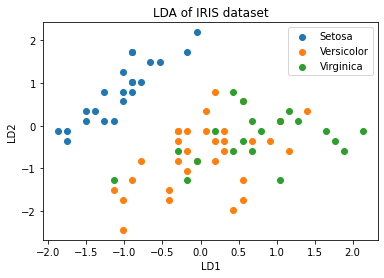

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris_df = pd.read_csv('iris_dataset.csv')
target_names=["Setosa","Versicolor","Virginica"]
X = iris_df.drop(columns=['Id','Species'],axis=1)
y = iris_df['Species']

# Split the dataset into training and testing sets
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

# Initialize and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Perform prediction on the testing set
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize LDA
plt.figure()
for i, target_name in zip(range(3), target_names):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()